# Machine Learning introduction course

Freely derived from https://www.kaggle.com/c/titanic

Answers to the titanic notebook, made during class, June 13, 2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
ls 

titanic.csv            titanic.ipynb          titanic_answers.ipynb


In [3]:
# if you don't have the data
# !wget https://raw.githubusercontent.com/vuillaut/datascience_intro/main/machine_learning/titanic/titanic.csv

## Read the data

You should know how to that now... hint: 🐼

In [4]:
titanic = pd.read_csv('titanic.csv')

## Explore the data

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### Columns in the dataset

0. **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd). Proxy for socio-economic status.

1. **survived**: Survival (0 = No; 1 = Yes).

2. **name**: Name of the passenger.

3. **sex**: Sex of the passenger.

4. **age**: Age of the passenger.

5. **sibsp**: Number of Siblings/Spouses Aboard.

6. **parch**: Number of Parents/Children Aboard.

7. **ticket**: Ticket Number.

8. **fare**: Passenger Fare.

9. **cabin**: Cabin number.

10. **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

11. **boat**: Lifeboat (if the passenger survived and was on a lifeboat).

12. **body**: Body identification number (if the passenger did not survive and their body was found).

13. **home.dest**: Home/Destination of the passenger.


In [6]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


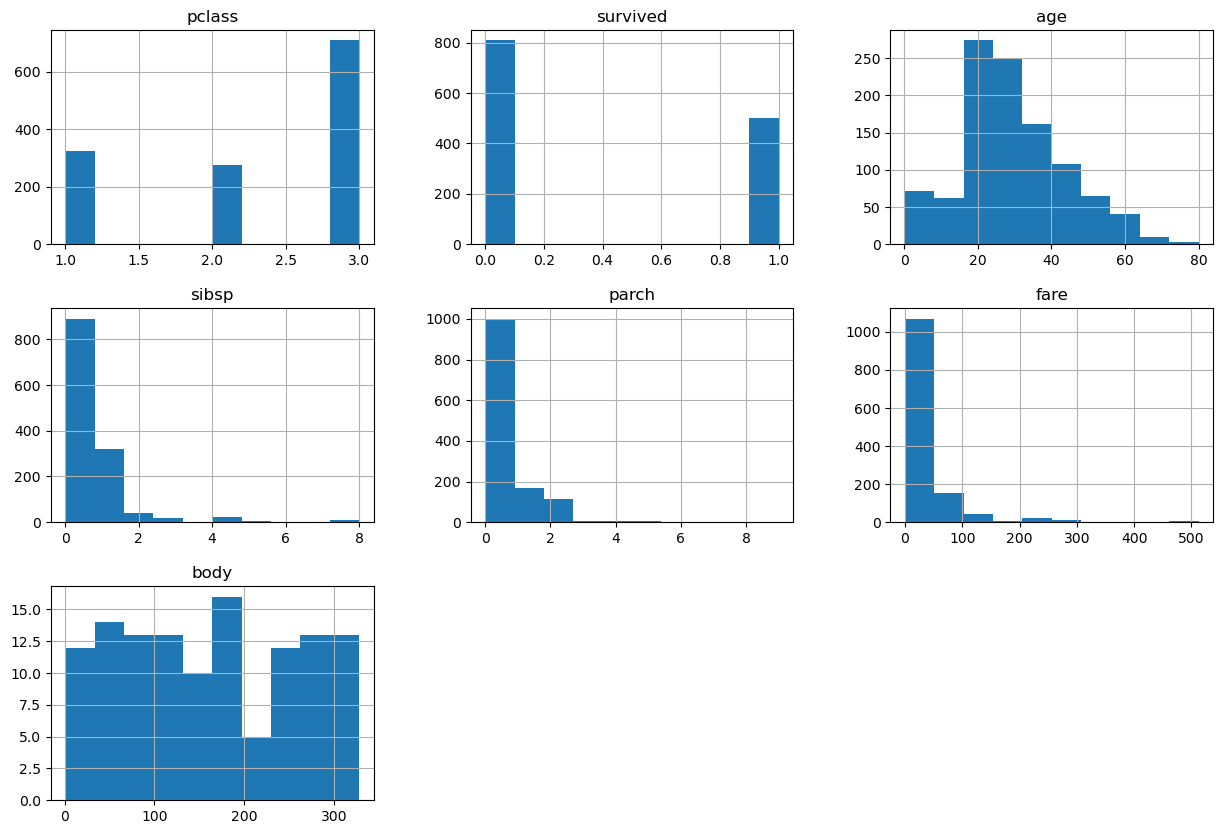

In [7]:
titanic.hist(figsize=(15,10));

## Find some correlations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


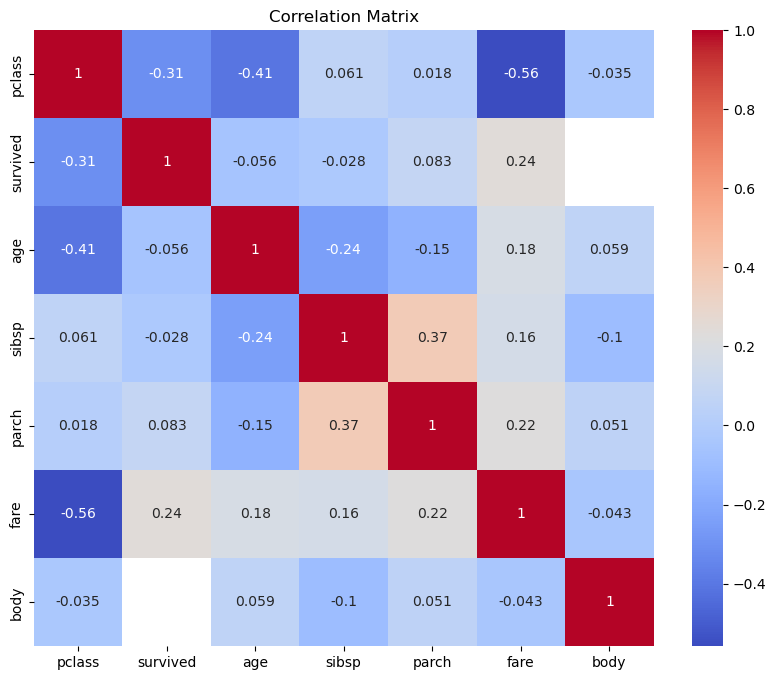

In [9]:
# Calculate the correlation matrix
df_numeric = titanic.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Exercise: Find another one by encoding the `sex` column into integer and rerun the correlation code

In [10]:
pd.get_dummies(titanic, columns=['sex'])

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",True,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",False,True
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,True,False
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,True,False
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,False,True
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,False,True


In [11]:
titanic.sex.replace({'male': 1, 'female':0}, inplace=True)

In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


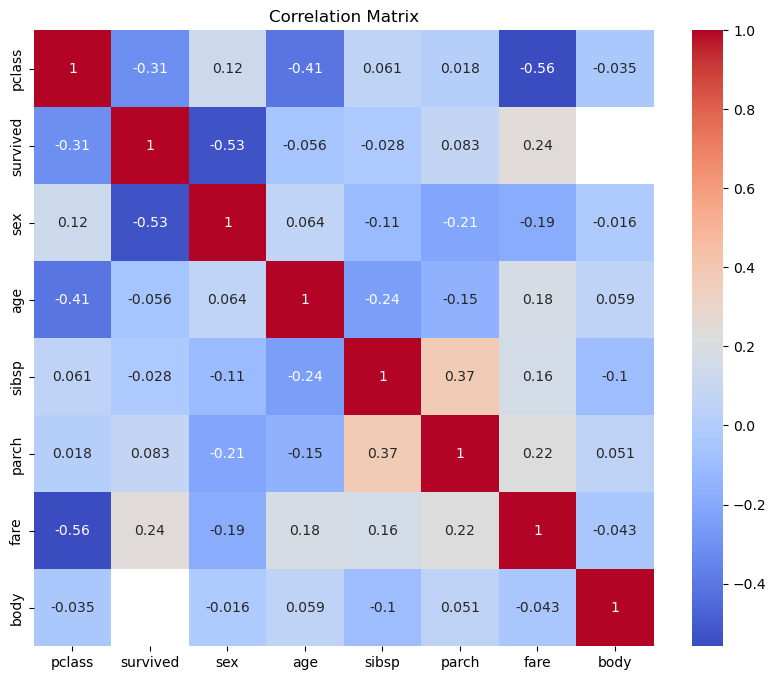

In [13]:
# Calculate the correlation matrix
df_numeric = titanic.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Machine Learning

Here we will try to predict the probability to survive of unkown persons.    
The target variable will then be `survived` and we must drop the `body` variable.


In [14]:
target = 'survived'

### Choose your training features as a list of strings from the colnames

In [15]:
training_features = ['age', 'fare', 'pclass']

In [16]:
# we will work with this data for now

data = titanic[training_features + [target]]
data.head()

,age,fare,pclass,survived
0,29.0000,211.3375,1,1
1,0.9167,151.5500,1,1
2,2.0000,151.5500,1,0
3,30.0000,151.5500,1,0
4,25.0000,151.5500,1,0


### Fixing the random seed for reproducibility of results

In [17]:
np.random.seed(42)

## Divide the dataset into train and test

In [18]:
# Lets drop all NaN

In [19]:
data.dropna(inplace=True)

/var/folders/59/4fqs_6jj1c91hc_fqclch3fc0000gp/T/ipykernel_18982/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [20]:
from sklearn.model_selection import train_test_split


# X will be the input, so we drop the target feature. y is the output = target.
X = data.drop(target, axis=1)[training_features]  
y = data[target]  

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train your first classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

In [22]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
pred = classifier.predict(X_test)

In [24]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [25]:
pd.DataFrame(np.transpose([y_test.values, pred]), columns=['truth', 'prediction'])

,truth,prediction
0,1,0
1,1,1
2,0,0
3,0,0
4,1,0
...,...,...
204,1,0
205,1,0
206,1,1
207,1,0


Is this good ? ... 

## Evaluation of the prediction

### Classification Metrics in Machine Learning

#### True / False - Positives / Negatives

![true_pos](https://miro.medium.com/v2/resize:fit:640/format:webp/1*7EYylA6XlXSGBCF77j_rOA.png)

When we build a classification model, it's important to assess its performance. This is done using various metrics that each provide different insights into the quality of the model. Here are some of the main classification metrics:

#### 1. Accuracy

Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observations to the total observations.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{\text{True negatives + True positives}}{\text{Total Number of Predictions}} $$

**Advantages:**
- Easy to understand and interpret.
- Useful when the target classes are well balanced.

**Drawbacks:**
- Can be misleading if the data is imbalanced. A model that always predicts the majority class will have high accuracy but may be a poor model.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/341px-Sensitivity_and_specificity_1.01.svg.png" alt="Sensitivity and Specificity" width="341" align='right'>

#### 2. Precision (Specificity)

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$


**Advantages:**
- Useful when the cost of False Positives is high. For example, in spam detection, you would rather let a few spam emails through (False Negatives) than accidentally mark a legitimate email as spam (False Positive).

**Drawbacks:**
- Not useful if the cost of False Negatives is high. It doesn't take into account the False Negatives.


source: https://en.wikipedia.org/wiki/File:Sensitivity_and_specificity_1.01.svg

#### 3. Recall (Sensitivity)

Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to the all observations in actual class.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

**Advantages:**
- Useful when the cost of False Negatives is high. For example, in disease prediction, you would rather predict that a healthy person is sick (False Positive) than overlook a sick person (False Negative).

**Drawbacks:**
- Not useful if the cost of False Positives is high. It doesn't take into account the False Positives.


#### 4. F1 Score

The F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. It is useful in the case of uneven class distribution problems.

$$ \text{F1 Score} = 2*\frac{\text{Precision}*\text{Recall}}{\text{Precision} + \text{Recall}} $$

**Advantages:**
- Balances the trade-off between Precision and Recall.
- Useful when the data is imbalanced.

**Drawbacks:**
- Not interpretable in terms of the business problem.
- Assumes that Precision and Recall are equally important, which might not be the case.


#### 5. Area Under ROC (Receiver Operating Characteristic) Curve (AUC-ROC)

AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much th emodel is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

Each of these metrics provides a different perspective on the performance of the model, and it's important to consider all of them when evaluating your model. The choice of metric depends on your scientific objective.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png" alt="Sensitivity and Specificity" width="500" >

**Advantages:**
- Useful for binary classification problems.
- Takes into account both False Positive rate (1-Specificity) and True Positive rate (Recall).

**Drawbacks:**
- Not suitable for imbalanced datasets: can be overly optimistic if classes are highly imbalanced.
- More difficult to interpret in terms of scientific

---- 
Consider the case of a population of 1000 patients: 990 of the patients are healthy and 10 have a disease.  

We build a test that returns the following results:
- Patients with disease (predicted) = 0 (our model predicts everyone as healthy)
- Healthy patients (predicted) = 1000 (our model predicts everyone as healthy)

Give TP, TN, FP, FN.

What is the accuracy? Is this a good measure of our test performances?

----


Now let's compute these metrics for our dataset.    
Is the test dataset balanced ?



In [26]:
recall = 0/(10+0)

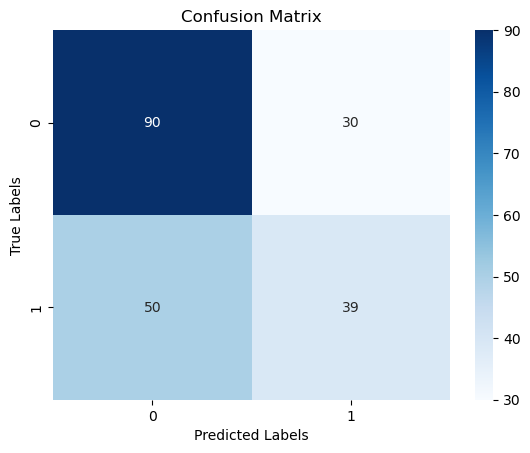

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
## cm = cm/cm.sum()  # if you prefer %

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Question: where are the true positives, true negatives, false positives and false negatives ?

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)

print(f"The accuracy of the prediction is: {accuracy*100:.2f}%")

The accuracy of the prediction is: 61.72%


### Exercise: compute the precision, recall and f1_score. 
Be mindful of the `pos_label`.

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
precision = precision_score(y_test, pred, pos_label=1)

recall = recall_score(y_test, pred, pos_label=1)

f1 =  f1_score(y_test, pred, pos_label=1)

precision, recall, f1

(0.5652173913043478, 0.43820224719101125, 0.49367088607594933)

In [31]:
recall = recall_score(y_test, pred, pos_label=0)
recall 

0.75

### Prediction of the probability 

Instead of predicting directly the class, the classifier is providing a probability for each sample and class and then applies a threshold.

In [32]:
pred_proba = classifier.predict_proba(X_test)
pred_proba[:10]

array([[0.88      , 0.12      ],
       [0.33      , 0.67      ],
       [0.96      , 0.04      ],
       [0.94416667, 0.05583333],
       [0.61      , 0.39      ],
       [0.59      , 0.41      ],
       [0.74      , 0.26      ],
       [0.5       , 0.5       ],
       [0.62375   , 0.37625   ],
       [0.51166667, 0.48833333]])

### ROC Curve and AUC score

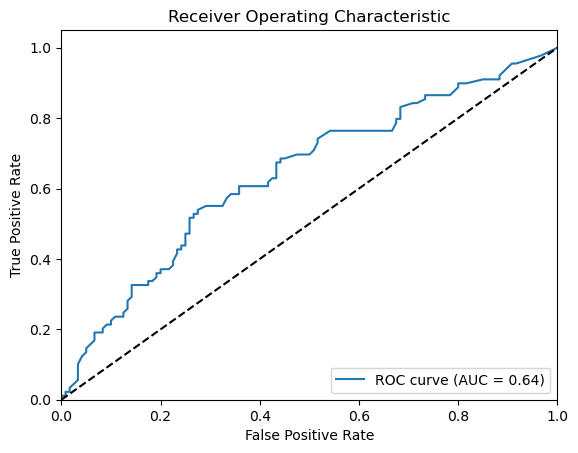

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
roc_auc = roc_auc_score(y_test, pred_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [34]:
## Re-implement ROC Curve by hand

import numpy as np

def compute_tfpn(y_true, y_pred, pos_label=1):
    tp = np.sum((y_true == pos_label) & (y_pred == pos_label))
    fp = np.sum((y_true != pos_label) & (y_pred == pos_label))
    tn = np.sum((y_true != pos_label) & (y_pred != pos_label))
    fn = np.sum((y_true == pos_label) & (y_pred != pos_label))

    return tp, fp, tn, fn


def compute_fpr_tpr(y_true, y_score, pos_label=1):
    tp, fp, tn, fn = compute_tfpn(y_true, y_score, pos_label=pos_label)
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    
    return fpr, tpr

In [35]:
# We vary the threshold between 0 and 1 and compute the FPR and TPR everytime

tpr = []
fpr = []
pos_label = 0
for threshold in np.linspace(0, 1, 1000, endpoint=True):
    pred_t = pred_proba[:,1] >= threshold
    r = compute_fpr_tpr(y_test.values, pred_t, pos_label=pos_label)
    fpr.append(r[0])
    tpr.append(r[1])
    
fpr = np.array(fpr)
tpr = np.array(tpr)

In [36]:
# auc is the area under the curve
auc_score = np.trapz(tpr, fpr)

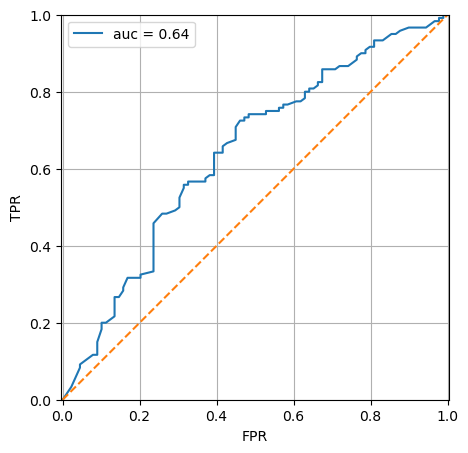

In [37]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'auc = {auc_score:.2f}')
plt.plot([0,1], [0,1], ls='--')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.legend();

# Improving the performances

We have now trained our first classifier, but let's try to improve its performances.
There are many ways we can try to improve it, here we'll see:
- trying different algorithms
- playing with hyperparameters
- feature engineering


**_Metric ?_**    
Let's say our goal is to maximise survival (= disease like problem), so we will try to **maximise recall with a positive label = 0**

## Trying different algorithms

![](https://scikit-learn.org/stable/_static/ml_map.png)
source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Exercise: Model and hyperparameters

Try the prediction with a GradientBoostingClassifier

Then play with the hyperparameters to try to improve the performances.

Note down the best recall along with the hyperparameters used.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# recall on pos_label = 0 was 0.75 

In [40]:
classifier = GradientBoostingClassifier(n_estimators=20, 
                                        learning_rate=0.05,
                                        max_features=2,
                                       )

In [41]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
recall_score(y_test, pred, pos_label=0)

0.9166666666666666

### Question: what are the issues with this way of doing?

### A word on overfitting

#### Why increasing the number of estimators is not always a good thing ?

In [42]:
n_estimators = [2,10, 20, 50, 100, 400, 1000]

recall = []
recall_train = []

for n in n_estimators:
    classifier = GradientBoostingClassifier(n_estimators=n)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    pred_train = classifier.predict(X_train)
    
    recall.append(recall_score(y_test, pred, pos_label=0))
    recall_train.append(recall_score(y_train, pred_train, pos_label=0))

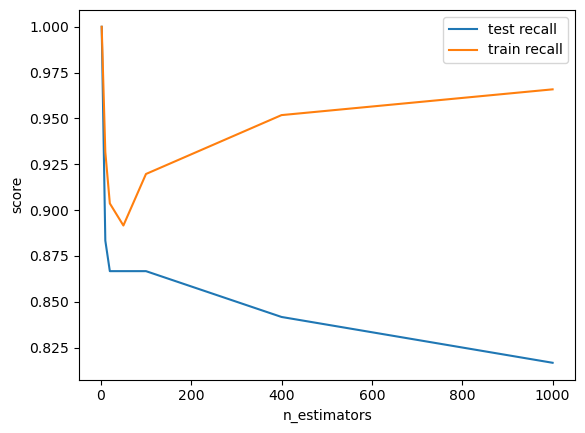

In [43]:
plt.plot(n_estimators, recall, label='test recall')
plt.plot(n_estimators, recall_train, label='train recall')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()

#### Why optimising (even by hand!) to find the best score on the test dataset is not a good practice either?

In [44]:
n_estimators = [5, 10, 20]
learning_rate = [0.01, 0.1, 1]
max_depth = [1, 3, 5]

best_params = None
highest_recall = 0

for n in n_estimators:
    for lr in learning_rate:
        for md in max_depth:
            gbc = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, max_depth=md)
            gbc.fit(X_train, y_train)
            preds = gbc.predict(X_test)
            recall = recall_score(y_test, preds, pos_label=0)
            if recall > highest_recall:
                highest_recall = recall
                best_params = {'n_estimators': n, 'learning_rate': lr, 'max_depth': md}

print("Best parameters: ", best_params)
print("Highest recall on test set: ", highest_recall)

Best parameters:  {'n_estimators': 5, 'learning_rate': 0.01, 'max_depth': 1}
Highest recall on test set:  1.0


### Validation dataset

To avoid the issue of information leak from the test dataset into the model, we use a validation dataset taken from the training dataset.

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Nv2NNALuokZEcV6hYEHdGA.png" alt="Sensitivity and Specificity" width="600" align="center"/>
</div>


#### Cross-validation

> However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

> A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:
A model is trained using `k-1` of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<div align="center">
    <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Sensitivity and Specificity" width="800"/>
</div>


source: https://scikit-learn.org/stable/modules/cross_validation.html

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5]
}

classifier = GradientBoostingClassifier()

scorer = make_scorer(recall_score, pos_label=0)


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring=scorer,
                           cv = 5)


grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score:  0.8995757575757576


In [46]:
classifier = GradientBoostingClassifier(**grid_search.best_params_)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [47]:
pred= classifier.predict(X_test)

In [48]:
recall_score(y_test, pred, pos_label=0)

0.8833333333333333

## Feature engineering

### Visualize features importance

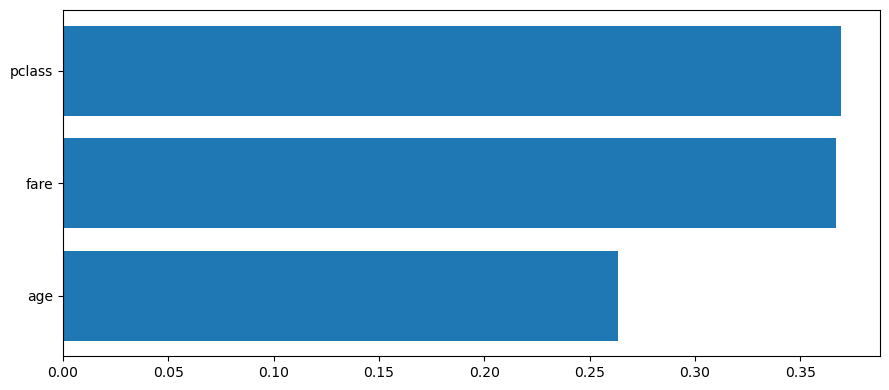

In [49]:
import matplotlib.pyplot as plt


# Get feature importances
importances = classifier.feature_importances_

feature_names = training_features
# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

plt.figure(figsize=(9,4))
plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), names, rotation=0);
plt.tight_layout()


In [50]:
importances.sum()

1.0

In [51]:
from copy import deepcopy

# Work on a copy of the dataset in case you perform destructive operations
df = deepcopy(titanic)

In [52]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Filling missing values
One can fill missing values in order to increase the size of training data.
There are many strategies to fill the missing values.

In [53]:
np.count_nonzero(df['embarked']), len(df)

(1309, 1309)

In [54]:
np.isnan(df.select_dtypes(include=['float64', 'int64'])).any()

pclass      False
survived    False
sex         False
age          True
sibsp       False
parch       False
fare         True
body         True
dtype: bool

In [55]:
# example with the port: fill missing embarked values with the most common port

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

#### Exercice: Proceed with other columns with missing values

In [56]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)


### Create new features 

In [58]:
# Example: extract title from Name using regular expression (regex)
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
set(df['Title'])

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

#### Exercice: create a `family_size` column by combining `sibsp` and `parch`

In [59]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

#### Exercice: Bin `age` into different age groups to create a column `age_group`

In [60]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Young_adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,family_size,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1,Young_adult
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,4,Child
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,4,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,4,Young_adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,4,Young_adult


### Scale the features 

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'Age' and 'Fare' columns and transform them
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])


In [62]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,family_size,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",0,-0.068420,0,0,24160,3.442480,B5,S,2,NaN,"St Louis, MO",Miss,1,Young_adult
1,1,1,"Allison, Master. Hudson Trevor",1,-2.249092,1,2,113781,2.286476,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,4,Child
2,1,0,"Allison, Miss. Helen Loraine",0,-2.164974,1,2,113781,2.286476,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,4,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,0.009230,1,2,113781,2.286476,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,4,Young_adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,-0.379021,1,2,113781,2.286476,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,4,Young_adult


### Encode features

In [63]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'Title', 'age_group'])


####  Q: Another column we can apply this to?

In [64]:
# Finally, drop features that might not be useful
df = df.drop(['name', 'ticket', 'cabin', 'body', 'home.dest', 'boat'], axis=1)

df.head()


,pclass,survived,age,sibsp,parch,fare,family_size,sex_0,sex_1,embarked_C,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,age_group_Child,age_group_Teenager,age_group_Young_adult,age_group_Adult,age_group_Senior
0,1,1,-0.068420,0,0,3.442480,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,1,-2.249092,1,2,2.286476,4,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0,-2.164974,1,2,2.286476,4,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0,0.009230,1,2,2.286476,4,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,1,0,-0.379021,1,2,2.286476,4,True,False,False,...,False,True,False,False,False,False,False,True,False,False


In [65]:
# Question: should we drop the redundant columns?
# Or can we improve encoding ?


In [66]:
test_df = titanic.copy()

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [68]:
encoders = {}
for col in ['sex', 'embarked']:
    encoders[col] = LabelEncoder()
    test_df[col] = encoders[col].fit_transform(test_df[col])

In [69]:
test_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [70]:
# trick: keep the encoders in a dict to be able to apply `inverse_transform` later
encoders

{'sex': LabelEncoder(), 'embarked': LabelEncoder()}

In [71]:
## question: is home.dest useful ?

In [72]:
list(set(test_df['home.dest']))[:20]

['Cooperstown, NY',
 'Auburn, NY',
 'Sweden Worcester, MA',
 'St Louis, MO',
 'Walthamstow, England',
 'London / Winnipeg, MB',
 'Milwaukee, WI',
 'Guntur, India / Benton Harbour, MI',
 'Catford, Kent / Detroit, MI',
 'Ilford, Essex / Winnipeg, MB',
 'Duluth, MN',
 'Seattle, WA',
 'England Oglesby, IL',
 'Ireland New York, NY',
 'London New York, NY',
 'Syria Youngstown, OH',
 'Worcester, England',
 'Bath, England / Massachusetts',
 'St Ives, Cornwall / Calumet, MI',
 'Paris /  New York, NY']

## Train a new classifier with this data
- try different hyperparameters (use GridCV)
- who got the best classifier ?

## Putting it all together

In [114]:
df = titanic.copy()
# Example: extract title from Name using regular expression (regex)
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
set(df['Title'])

df['family_size'] = df['sibsp'] + df['parch'] + 1

bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Young_adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,family_size,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1,Young_adult
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,4,Child
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,4,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,4,Young_adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,4,Young_adult


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score


# Define features and target
target = 'survived'
features = list(df.columns)
features.remove(target)
features.remove('body')
features.remove('boat')
features.remove('home.dest')
features.remove('name')
print(f'Training features: {features}')


# Split the data into trainaing and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define preprocessing for numeric columns
# ['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'Title', 'family_size', 'age_group']

numeric_features = list(set(df.select_dtypes(include=['float64', 'int64']).columns).intersection(set(features)))
print("numeric features: ", numeric_features)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
# categorical_features = ['pclass', 'sex', 'embarked', 'Title', 'age_group', 'cabin']
categorical_features = list(set(features) - set(numeric_features))
print("categorical features: ", categorical_features)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = GradientBoostingClassifier()



Training features: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'Title', 'family_size', 'age_group']
numeric features:  ['pclass', 'family_size', 'sibsp', 'fare', 'sex', 'age', 'parch']
categorical features:  ['age_group', 'embarked', 'cabin', 'ticket', 'Title']


In [132]:
# Here we will use the `Pipeline` method from scikit-learn to combine everything together
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model),
                          ])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__learning_rate': [0.01, 0.1, 1],
    'model__max_depth': [1, 3, 5]
}

# Create a scorer
# scorer = make_scorer(recall_score, pos_label=0)
# scorer = 'accuracy'
scorer = make_scorer(roc_auc_score, needs_proba=True)


# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best score on CV: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

# Retrain the model on the whole training set using best parameters
best_params = grid_search.best_params_
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)
print("Test set recall score: ", recall_score(y_test, y_pred, pos_label=0))


Best score on CV:  0.8146776030986558
Best parameters:  {'model__learning_rate': 0.1, 'model__max_depth': 1, 'model__n_estimators': 100}
Test set recall score:  0.875


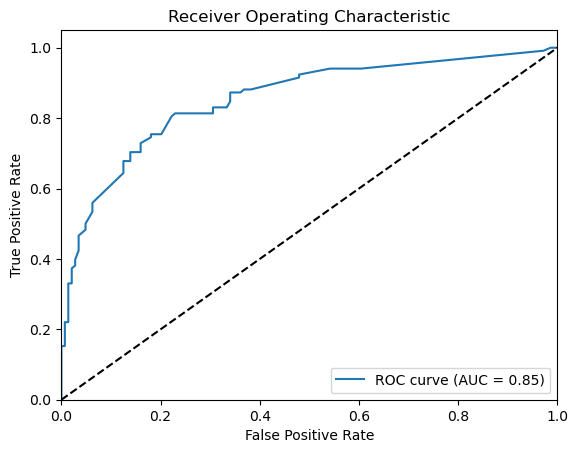

In [133]:
pred_proba = pipeline.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
roc_auc = roc_auc_score(y_test, pred_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


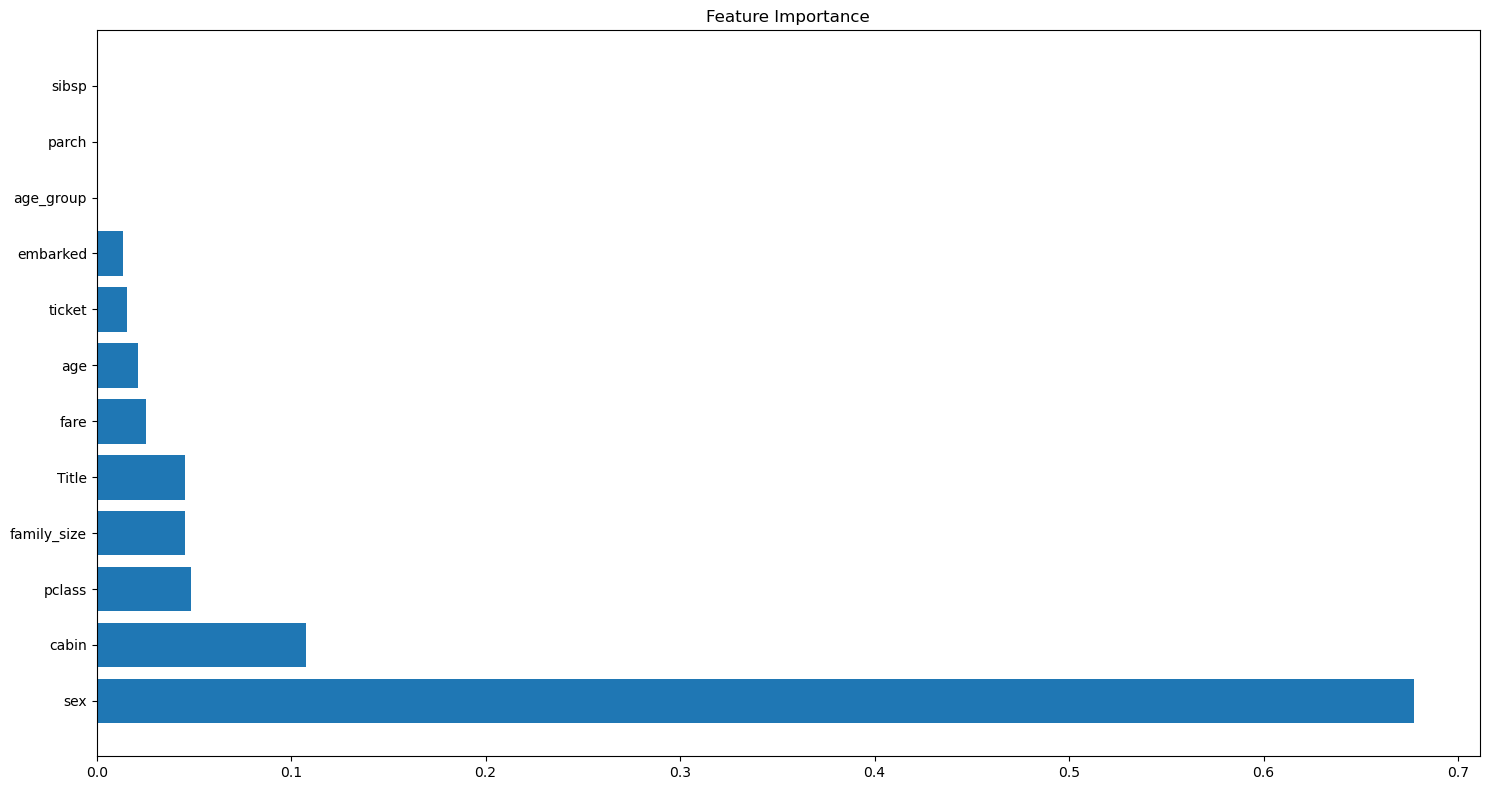

In [135]:
import matplotlib.pyplot as plt

# Fit the model with the best parameters on the whole training set
pipeline.fit(X_train, y_train)

# Get feature importances
importances = pipeline.named_steps['model'].feature_importances_

# Get feature names
# Note: this assumes that all transformations inside ColumnTransformer are named 'onehot'
# and that they are all OneHotEncoder transformations
feature_names = numeric_features + \
                list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(input_features=categorical_features))

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(15,8))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(len(indices)), importances[indices])

# Add feature names as x-axis labels
plt.yticks(range(len(indices)), names, rotation=0)

plt.tight_layout()
# Show plot
plt.show()


For an explanation nof the partial dependence plot, see:    
https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html

Computing partial dependence plots...


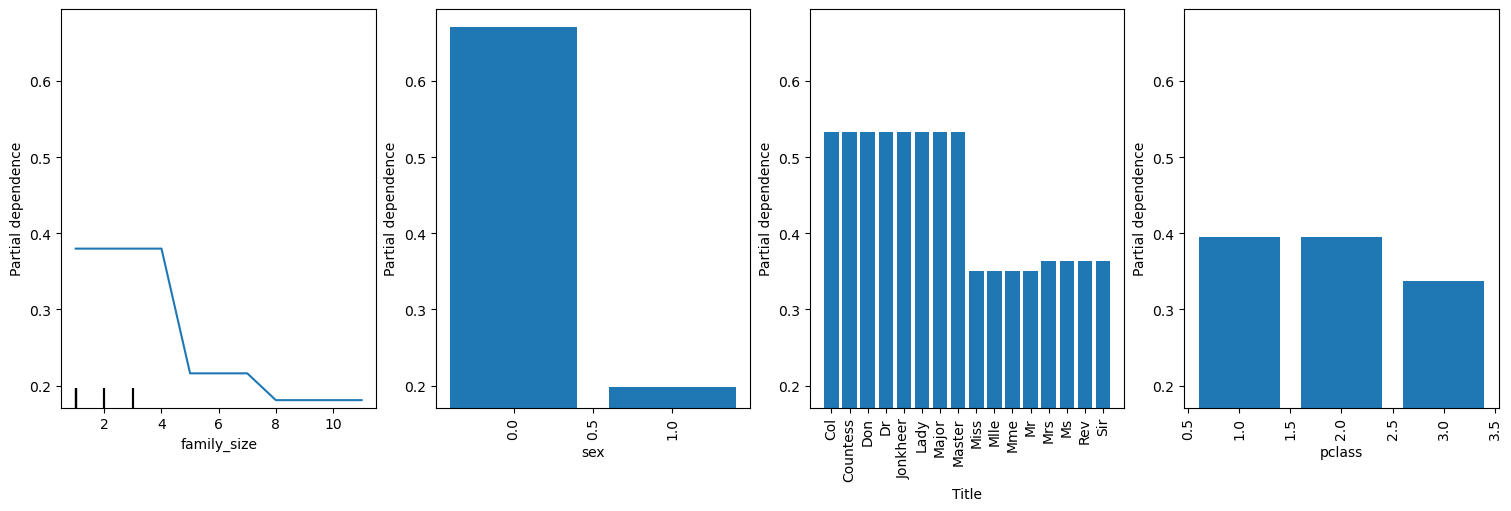

In [145]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ["family_size", "sex", "Title", "pclass"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ["sex", "Title", "pclass"],
}

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 5), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    pipeline,
    X_train,
    **features_info,
    ax=axes,
    **common_params,
)



### Question: can we improve the performances by changing the train/test split ratio?

Increasing train data should almost always improve the performances of the model.

However, having less test data will decrease the confidence of the performance evaluation.

Here is a demo using [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) to compute the confidence interval on the accuracy.

In [78]:
# !pip install statkit

In [79]:
from statkit.non_parametric import bootstrap_score

In [80]:
tree_accuracy = []
number_of_test_samples = [10, 20, 40, 60, 80, 100, 150, len(X_test)]
for n in number_of_test_samples:
    pred = pipeline.predict(X_test[:n])
    tree_accuracy.append(bootstrap_score(y_test[:n], pred, metric=accuracy_score))

Text(0, 0.5, 'accuracy')

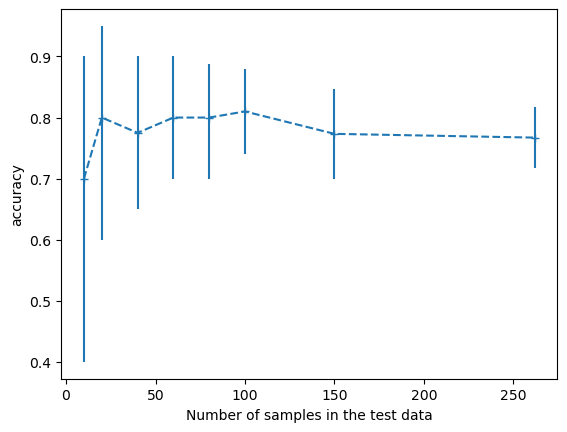

In [81]:
y = [ta.point for ta in tree_accuracy]
yerr = np.transpose([(ta.point-ta.lower, ta.upper-ta.point) for ta in tree_accuracy])
plt.errorbar(number_of_test_samples, y, yerr=yerr, ls='--', marker='+') 
plt.xlabel('Number of samples in the test data')
plt.ylabel('accuracy')